# Report

---

In this notebook, you can see an implementation for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

## Implementation specs

### 1. Summary

I implement a [Deep Q-Network](https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf)

### 2. Details

The agent keeps track of two DQNs: a local version, and a target version, one updated less often than the other.

#### 2-1. Networks

I used hidden_dim = [64, 64] as defalt list.

The network structure is as follows:

state -> Linear(state_size, hidden_dim[0]) -> leak_relu -> Linear(hidden_dim[0], hidden_dim[1]) -> leak_relu -> Linear(hidden_dim[1], action_size)

#### 2-2. Hyperparameters

Agent hyperparameters are passed as constructor arguments to `Agent`.  The default values, used in this project, are:

| parameter    | value  | description                                                                   |
|--------------|--------|-------------------------------------------------------------------------------|
| buffer_size  | 100000 | Number of experiences to keep on the replay memory for the DQN                |
| batch_size   | 64     | Minibatch size used at each learning step                                     |
| gamma        | 0.99   | Discount applied to future rewards                                            |
| tau          | 1e-3   | Scaling parameter applied to soft update                                      |
| learn_rate   | 5e-4   | Learning rate used for the Adam optimizer                                     |
| update_every | 4      | Number of agent steps between update operations                               |

Training hyperparameters are passed to the training function `train` of `Agent`, defined below.  The default values are:

| parameter                     | value            | description                                                             |
|-------------------------------|------------------|-------------------------------------------------------------------------|
| n_episodes                    | 1800             | Maximum number of training episodes                                     |
| max_t                         | 1000             | Maximum number of steps per episode                                     |
| eps_start, eps_end, eps_decay | (1, 0.01, 0.995) | Interpolation parameters for decaying epsilon on epsilon-greedy policy |

## Execution

Import required system packages:

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Let's get the state and action dimensions, and initialize our agent:

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

In [4]:
# state size
state_size = len(env_info.vector_observations[0])
print('State size: ', state_size)

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

State size:  37
Number of actions: 4


In [5]:
# Initialize agent

from dqn_agent import Agent

agent = Agent(
    state_size=state_size, 
    action_size=action_size,
    seed=0
)

Here, I trained the agent to see how many episodes the agent need to solve the RL problem.

In [6]:
scores = agent.train(env, n_episodes=1800, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995)
# env.close()

Episode 100	Average Score: 0.09
Episode 200	Average Score: 0.01
Episode 300	Average Score: 0.07
Episode 400	Average Score: 0.38
Episode 500	Average Score: 1.45
Episode 600	Average Score: 3.20
Episode 700	Average Score: 5.34
Episode 800	Average Score: 7.93
Episode 900	Average Score: 5.02
Episode 1000	Average Score: 7.12
Episode 1100	Average Score: 10.33
Episode 1200	Average Score: 9.92
Episode 1300	Average Score: 10.29
Episode 1400	Average Score: 10.88
Episode 1500	Average Score: 13.65
Episode 1600	Average Score: 15.67
Episode 1700	Average Score: 16.64
Episode 1800	Average Score: 15.81


And let's see the score-epsiode plots of Vanilia DQN agent

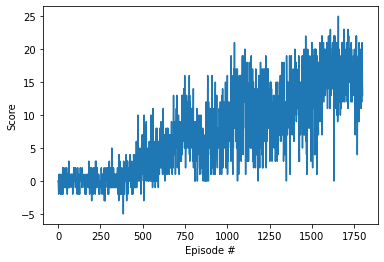

In [7]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Here, I just load the already trained agent using `saved_DQN_agent.pth` to see the result.

Finally, we can watch the solved agent:
```
if you want to see agent's action slowly to see the result of 100 consecutive rewards,
then set mode = 'slow'
else if fastly, mode = 'fast'
I set the mode = 'fast' as default
``` 

In [8]:
# env = UnityEnvironment(file_name="Banana_Linux/Banana.x86")
# get the default brain
# brain_name = env.brain_names[0]
mode = 'fast'
agent.qnetwork_local.load_state_dict(torch.load('saved_DQN_agent.pth'))
print('====================================')
print('Sucessfully loaded from {}'.format('saved_DQN_agent.pth'))
print('====================================')

score_test = []                                  
for test_episode in range(1, 100+1):
    train_mode = True if mode == 'fast' else False
    env_info = env.reset(train_mode=train_mode)[brain_name]      # reset the environment
    state = env_info.vector_observations[0]                      # get the current state
    score_temp = 0.                                              # initialize the score
    while True:
        action = agent.act(state, 0.)                            # select an action
        env_info = env.step(action)[brain_name]                  # send the action to the environment
        next_state = env_info.vector_observations[0]             # get the next state
        reward = env_info.rewards[0]                             # get the reward
        done = env_info.local_done[0]                            # see if episode has finished
        score_temp += reward                                     # update the score
        state = next_state                                       # roll over the state to next time step
        if done:                                                 # exit loop if episode finished
            score_test.append(score_temp)
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(test_episode, np.mean(score_test)), end="")
            score_temp = 0.
            break
    
print("\nFinal Score: {}".format(np.mean(score_test)))
# env.close()

Sucessfully loaded from saved_DQN_agent.pth
Episode 100	Average Score: 16.65
Final Score: 16.65


I also implement the `Double Deep Q-learning with Prioritized Experience Replay(PER)` to compare the result with `Vanila DQN` 

### Double DQNs

On the update operation, rather than just using the target network to both select the best action and compute its estimated value, we use the local network to pick an action, and then use the target network to compute its estimated value as below:

$$ Q_{target} = R + γ*Q_{network}(s', argmax_a \ {Q_{local}(s', a))} $$

### Prioritized Experience Replay

Rather than just keeping a buffer of experiences (s, a, r, s', d) with uniform sampling probability, each experience has a priority $p_i$, based on the TD error between the estimated Q value and the current Q value for that experience when last evaluated. Using this, each experience has a Importance Sampling(IS) weight $w_i$ as below:

$$ w_i = \left(\frac{1}{N} \frac{1}{P_i}\right)^{\beta} $$ 

For stability, I normalize the Importance Sampling(IS) weight $w_i$ by $1/max_i \ {w_i}$

I do annealing on $\beta$ as linearly from `BETA_INIT=0.4` to `BETA_MAX=1.0` with a step `BETA_INCREASE=0.005`.

Training result is as follows.


In [9]:
from ddqn_with_per_agent import Agent

agent = Agent(
    state_size=state_size, 
    action_size=action_size,
    seed=0
)

scores_DDQN_PER = agent.train(env, n_episodes=1800, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995)

Episode 100	Average Score: 0.25
Episode 200	Average Score: 2.98
Episode 300	Average Score: 6.44
Episode 400	Average Score: 9.47
Episode 500	Average Score: 14.04
Episode 600	Average Score: 15.48
Episode 633	Average Score: 16.00
Environment solved in 533 episodes!	Average Score: 16.00


And let's see the score-epsiode plots of Double DQN with PER agent

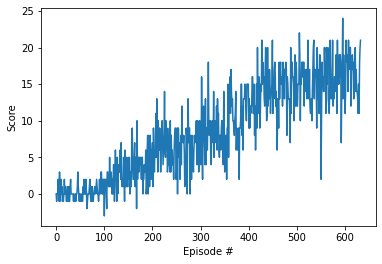

In [11]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_DDQN_PER)), scores_DDQN_PER)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

You can see that `DDQN_PER_agent` has finished problem in about 600 episodes but `Vainla_DQN_agent` in about 1700 episodes.

When done, close the environment:

In [12]:
env.close()

## Ideas for future work
* Implement remaining extensions on Rainbow DQN for this toy example.
* Perform a larger hyperparameter search, including hyper parameter annealing.
* Review literature for more recent DQN extensions.